<img src="Images/PoweredTechGirlz.png" width="15%" align="right">

# Activity 3: Text Mining Harry Potter - Most Popular Words

We will be using data provided by [Bradley Boehmke](https://github.com/bradleyboehmke/harrypotter).

The goal of this class is to do a textual analysis of the seven Harry Potter books. We will use Python to discover some interesting insights that maybe nobody else in the world has realized about the Harry Potter books! In this activity we will find the most popular words and combination of words in book 1.

<img src="Images/book_covers.png" width="60%" align="left">

In [1]:
import Helpers
from Helpers.load_data import *
from Helpers.plot_data import *
from Helpers.clean_data import *
from collections import Counter
from wordcloud import WordCloud, STOPWORDS

# Most popular words

## Clean up

We will try to find out which words are the most popular in each book.

We already know how to split each book into words, but this time we will need to do two additional steps.

First, look at the following piece of text:

In [2]:
text = (
    "Hagrid: \"You're a wizard, Harry\" "
    "Harry: \"I am a what?\" "
    "Hagrid: \"A wizard, Harry\" "
)
print(text)

Hagrid: "You're a wizard, Harry" Harry: "I am a what?" Hagrid: "A wizard, Harry" 


How can we find the most popular words in this piece of text?

As it turns out, Python has another neat function which we can use to do that. It's called a `Counter`. You can give `Counter` a list of words and it will count how many times does each word appear. 

To do that, we first need a list of words. In the cell below, split the text into words and assign the result to a new variable called `words`:

In [3]:
words = text.split()
print(words)

['Hagrid:', '"You\'re', 'a', 'wizard,', 'Harry"', 'Harry:', '"I', 'am', 'a', 'what?"', 'Hagrid:', '"A', 'wizard,', 'Harry"']


Now that we have separate words, we can pass those to a `Counter`:

In [4]:
Counter(words)

Counter({'"A': 1,
         '"I': 1,
         '"You\'re': 1,
         'Hagrid:': 2,
         'Harry"': 2,
         'Harry:': 1,
         'a': 2,
         'am': 1,
         'what?"': 1,
         'wizard,': 2})

What happened? `Counter` counted the words "Harry" and "Harry:" as two separate words. It also counted "A" and "a" as two separate words.

To fix this, we will need to remove all characters from the text which are not letters, and conver the text to lowercase.

First, lets convert the words to lowercase. In Python that can be done using a function called `lower`:

In [5]:
print("HELLO".lower())

hello


Lets do this for the words in our text:

In [6]:
lowercase_words = []

for word in words:
    lowercase_words.append(word.lower())
    
print(lowercase_words)

['hagrid:', '"you\'re', 'a', 'wizard,', 'harry"', 'harry:', '"i', 'am', 'a', 'what?"', 'hagrid:', '"a', 'wizard,', 'harry"']


Lets try the counter again:

In [7]:
Counter(lowercase_words)

Counter({'"a': 1,
         '"i': 1,
         '"you\'re': 1,
         'a': 2,
         'am': 1,
         'hagrid:': 2,
         'harry"': 2,
         'harry:': 1,
         'what?"': 1,
         'wizard,': 2})

We still have some special character in the text (like ':' and '"') that make Python think '"a' and 'a' are two separate words. We prepared a helper function that you can use to remove those special characters. It's called `remove_special_characters` :) This is how it works:

In [8]:
my_word = '"Harry!"'

print("Original word:", my_word)

clean_word = remove_special_characters(my_word)

print("Clean word:", clean_word)

Original word: "Harry!"
Clean word: Harry


Can you do this for all words in our text? Try to do that in the field below:

In [9]:
clean_words = []

for word in lowercase_words:
    clean_words.append(remove_special_characters(word))
    
print(clean_words)

['hagrid', "you're", 'a', 'wizard', 'harry', 'harry', 'i', 'am', 'a', 'what', 'hagrid', 'a', 'wizard', 'harry']


Let's try the counter again:

In [10]:
Counter(clean_words)

Counter({'a': 3,
         'am': 1,
         'hagrid': 2,
         'harry': 3,
         'i': 1,
         'what': 1,
         'wizard': 2,
         "you're": 1})

# It worked!

## Most popular words

Let's try to apply this to the first book. First, let's load the book and split it to words:

In [11]:
book_1 = load_book_1()

words = book_1.split()

print(words[0:26])

['THE', 'BOY', 'WHO', 'LIVED', 'Mr.', 'and', 'Mrs.', 'Dursley,', 'of', 'number', 'four,', 'Privet', 'Drive,', 'were', 'proud', 'to', 'say', 'that', 'they', 'were', 'perfectly', 'normal,', 'thank', 'you', 'very', 'much.']


Let's do what we just learned: turn all words to lowercase and remove special characters. We can do this in one go:

In [12]:
clean_words = []

for word in words:
    lowercase_word = word.lower()
    clean_word = remove_special_characters(lowercase_word)
    clean_words.append(clean_word)
    
print(clean_words[0:26])

['the', 'boy', 'who', 'lived', 'mr', 'and', 'mrs', 'dursley', 'of', 'number', 'four', 'privet', 'drive', 'were', 'proud', 'to', 'say', 'that', 'they', 'were', 'perfectly', 'normal', 'thank', 'you', 'very', 'much']


We just cleaned the whole book one!

We can use `Counter` to count occurences of all words in the book!

The list would be veeeeeeeeeeery long! So let's ask counter to only give us the 10 most common words:

In [13]:
Counter(clean_words).most_common(10)

[('the', 3627),
 ('and', 1918),
 ('to', 1855),
 ('a', 1688),
 ('he', 1527),
 ('of', 1259),
 ('harry', 1213),
 ('was', 1186),
 ('it', 1025),
 ('in', 965)]

# That's it! The 10 most common words in book 1!

Something happened though. Are all of the words useful to us? Is it useful knowing that "the" is the most common word?

In English, words like "the", "a", and "I" appear very often, but don't give us any useful information. The frequently appearing words are called "stopwords". They are important because they help to structure our sentences, but they don't tell us anything about the meaning of the text.

That's why in Text Mining we usually remove those words.

We prepared another helper function that you can use -- this function removes all stopwords from a list of words. It's called `remove_stopwords`:

In [14]:
print("Before:", clean_words[0:26])
print()

no_stopwords = remove_stopwords(clean_words)

print("After:", no_stopwords[0:26])

Before: ['the', 'boy', 'who', 'lived', 'mr', 'and', 'mrs', 'dursley', 'of', 'number', 'four', 'privet', 'drive', 'were', 'proud', 'to', 'say', 'that', 'they', 'were', 'perfectly', 'normal', 'thank', 'you', 'very', 'much']

After: ['boy', 'lived', 'mr', 'mrs', 'dursley', 'number', 'four', 'privet', 'drive', 'proud', 'say', 'perfectly', 'normal', 'thank', 'much', 'last', 'people', 'expect', 'involved', 'anything', 'strange', 'mysterious', 'hold', 'nonsense', 'mr', 'dursley']


Let's try the `Counter` again:

In [15]:
Counter(no_stopwords).most_common(10)

[('harry', 1213),
 ('ron', 410),
 ('hagrid', 336),
 ('hermione', 257),
 ('know', 188),
 ('see', 180),
 ('professor', 180),
 ('looked', 169),
 ('snape', 145),
 ('dumbledore', 142)]

# Yay! That worked!

Can you tell me who are the most frequently mentioned students in book 1?

Let's try to do this for book 2!

We prepared a bit of code to help you. Fill in the missing lines:

In [16]:
book_2 = load_book_2()

words = book_2.split()

clean_words = []

for word in words:
    lowercase_word = word.lower()
    clean_word = remove_special_characters(lowercase_word)
    clean_words.append(clean_word)
    
no_stopwords = remove_stopwords(clean_words)

Counter(no_stopwords).most_common(10)

[('harry', 1504),
 ('ron', 650),
 ('hermione', 289),
 ('malfoy', 202),
 ('lockhart', 197),
 ('professor', 190),
 ('know', 161),
 ('weasley', 157),
 ('looked', 155),
 ('go', 152)]

Remember that in the previous activity we used a function called `plot` to visualize the results? Let's try that again:

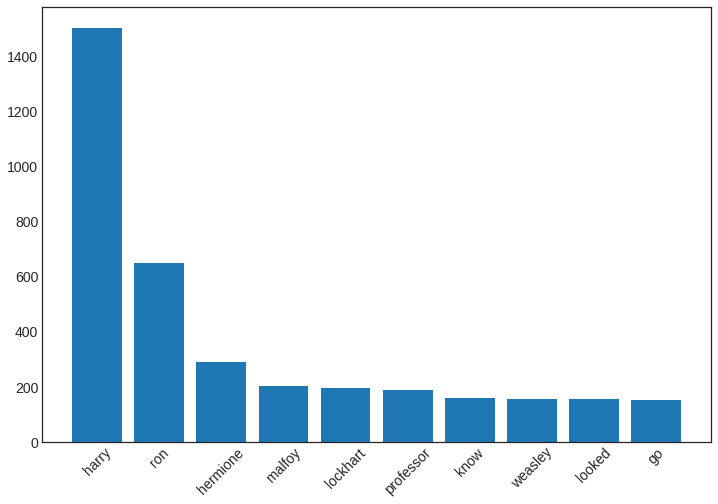

In [17]:
top_10_words = Counter(no_stopwords).most_common(10)

plot_words(top_10_words)

## Word pairs

What about combinations of words?

So far we were looking at a single word at a time. What if we want to find how often do two words appear in the text together? For example "professor lockhart".

Remember our text from the start of this activity?

In [18]:
print(text)

Hagrid: "You're a wizard, Harry" Harry: "I am a what?" Hagrid: "A wizard, Harry" 


We can split it to words:

In [19]:
words = text.split()

print(words)

['Hagrid:', '"You\'re', 'a', 'wizard,', 'Harry"', 'Harry:', '"I', 'am', 'a', 'what?"', 'Hagrid:', '"A', 'wizard,', 'Harry"']


That gives us single words.

We prepared a function which takes a list of words and turns those words into pairs:

In [20]:
pairs = get_word_pairs(words)

print(pairs)

['Hagrid: "You\'re', '"You\'re a', 'a wizard,', 'wizard, Harry"', 'Harry" Harry:', 'Harry: "I', '"I am', 'am a', 'a what?"', 'what?" Hagrid:', 'Hagrid: "A', '"A wizard,', 'wizard, Harry"']


In [21]:
Counter(pairs).most_common(10)

[('wizard, Harry"', 2),
 ('Hagrid: "You\'re', 1),
 ('"You\'re a', 1),
 ('a wizard,', 1),
 ('Harry" Harry:', 1),
 ('Harry: "I', 1),
 ('"I am', 1),
 ('am a', 1),
 ('a what?"', 1),
 ('what?" Hagrid:', 1)]

Let's do this for book 1.

In [22]:
book_1 = load_book_1()

words = book_1.split()

clean_words = []

for word in words:
    lowercase_word = word.lower()
    clean_word = remove_special_characters(lowercase_word)
    clean_words.append(clean_word)
    
no_stopwords = remove_stopwords(clean_words)

word_pairs = get_word_pairs(no_stopwords)

Counter(word_pairs).most_common(10)

[('uncle vernon', 97),
 ('professor mcgonagall', 90),
 ('aunt petunia', 52),
 ('harry ron', 51),
 ('ron hermione', 37),
 ('mr dursley', 30),
 ('harry potter', 26),
 ('harry felt', 24),
 ('harry looked', 24),
 ('professor dumbledore', 20)]

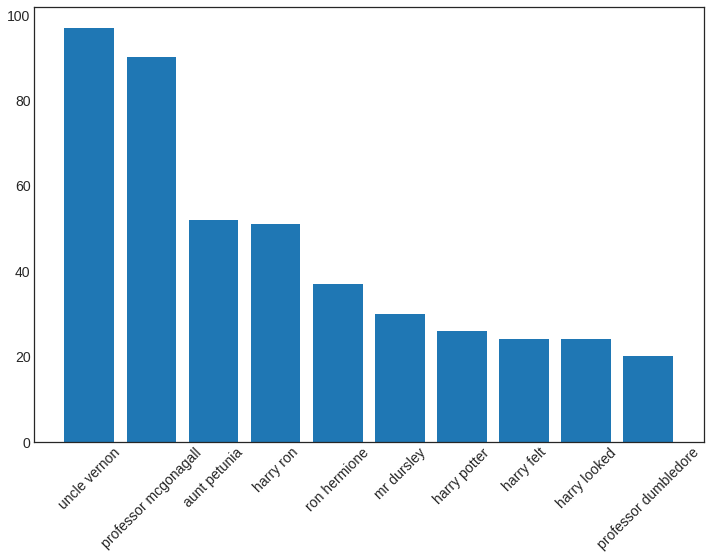

In [23]:
plot_words(Counter(word_pairs).most_common(10))

## Yeak you made it through activity 3.

Feel free to experiment with the notebook to learn even more about the Harry Potter books.